## Complex step derivative approximation

**Raibatak Das - 2021-03-29**

This notebook shows several examples of using the complex step approximation to compute the derivative of a real function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path

%config InlineBackend.figure_format='retina'

mpl.rcParams.update({'font.size': 14})
# Set the default color cycle
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(
    color = ["#1b9e77", "#d95f02", "#7570b3",
             "#e7298a", "#66a61e", "#e6ab02"])

### Example 1

Compute the first derivative of the function:
$$ f(x) = \frac{e^x}{(\cos x)^3 + (\sin x)^3}$$

Define function and complex-step derivative

In [2]:
def csderiv(func, h = 1e-8):
    # Complex-step derivative approximation
    return( lambda x: np.imag(func(np.complex(x, h)))/h )

f = lambda x: np.exp(x) / ((np.cos(x))**3 + (np.sin(x))**3)
dfdx = csderiv(f)

Also define exact exact analytic derivative for comparison

In [3]:
def fprime(x): 
    # Analytic derivative of e^x / ((cos x)^3 + (sin x)^3)
    den = (np.cos(x))**3 + (np.sin(x))**3
    num = np.exp(x) * (den + 3*np.cos(x)*np.sin(x)*(np.cos(x) - np.sin(x)))
    return( num/(den*den) )

In [4]:
# Compute over a range
x = np.linspace(-3.9*np.pi/16, np.pi/2, 100)
y, dy, exact = [np.array([y(xval) for xval in x]) 
                for y in (f, dfdx, fprime)]

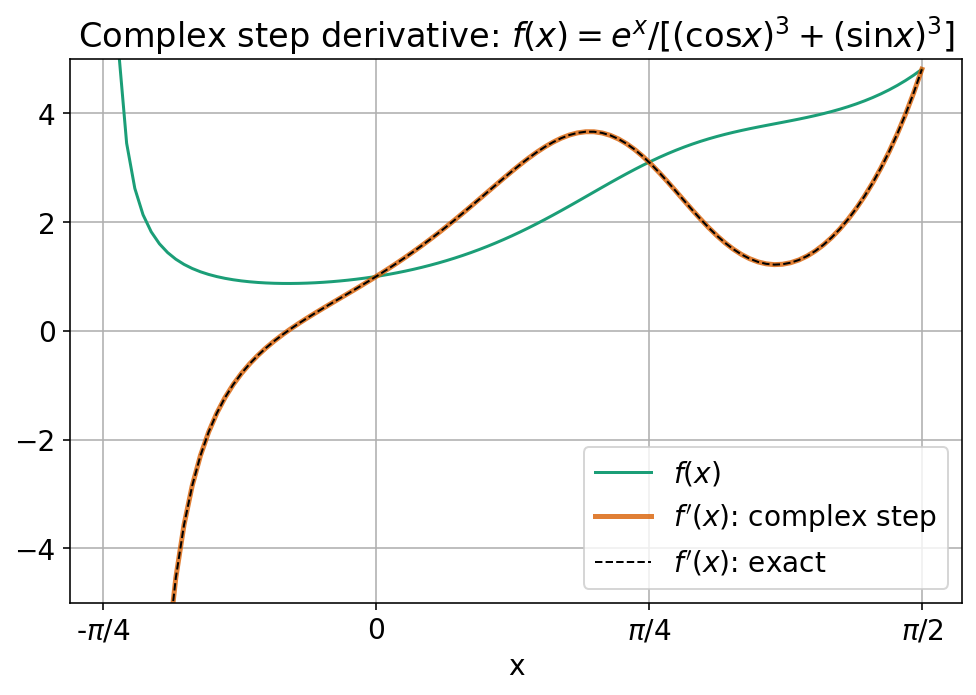

In [5]:
# Plot function and derivative
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(x, y, lw = 1.5, label = "$f(x)$")
ax.plot(x, dy, lw = 2.5, alpha = 0.8, label = "$f'(x)$: complex step")
ax.plot(x, exact, "k--", lw = 1, label = "$f'(x)$: exact")
ax.legend()
ax.set_ylim([-5, 5])
ax.set_xticks([-np.pi/4, 0, np.pi/4, np.pi/2])
ax.set_xticklabels(("-$\pi$/4", "0", "$\pi$/4", "$\pi$/2"))
ax.set_title(r"Complex step derivative: $f(x) = e^x / [(\cos x)^3 + (\sin x)^3]$")
ax.set_xlabel("x")
ax.grid(True)

In [6]:
# Uncomment to save plot
#outfile = Path("complex-step-derivative-ex1.png")
#fig.savefig(outfile, dpi = 150)

In [7]:
dfdx(1.5), fprime(1.5)

(3.622033700716325, 3.6220337007163255)

Compare complex step derivative with finite difference approximation

In [8]:
def fdiff(func, h = 1e-8):
    # Finite difference derivative approximation
    return( lambda x: (f(x+h/2) - f(x-h/2))/h )

# Compute finite difference 
dfdx_fd = fdiff(f)
dy_fd = np.array([dfdx_fd(xval) for xval in x])

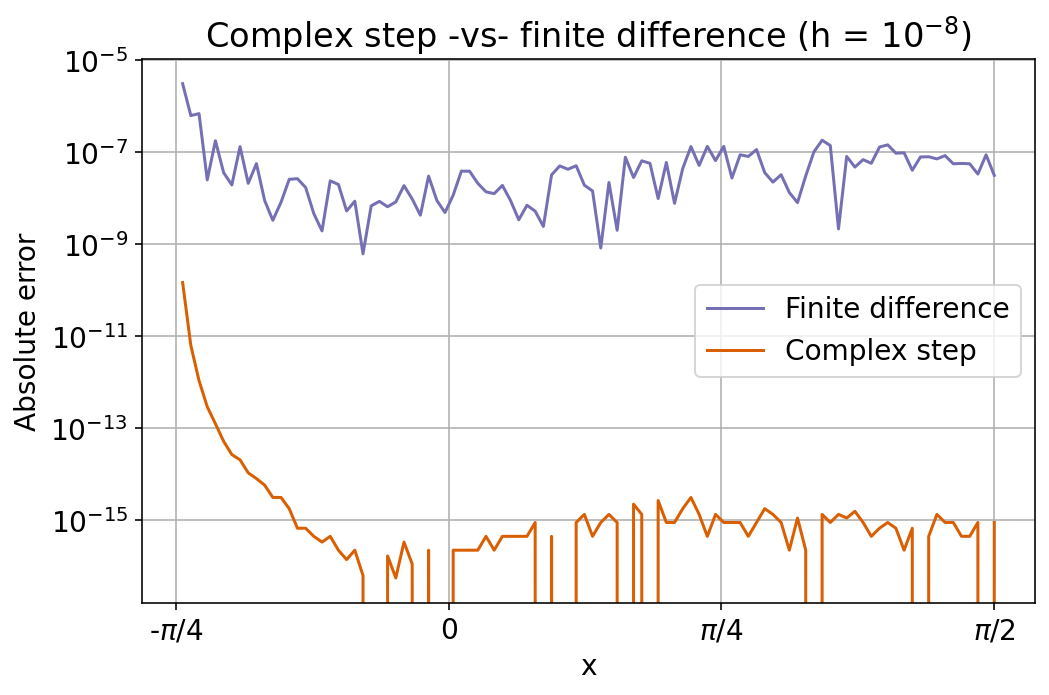

In [9]:
# Plot absolute error
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(x, np.abs(dy_fd - exact), "C2", lw = 1.5,
        label = "Finite difference")
ax.plot(x, np.abs(dy - exact), "C1", lw = 1.5, 
        label = "Complex step")
ax.set_yscale("log")
ax.legend()
ax.set_ylabel("Absolute error")
ax.set_xticks([-np.pi/4, 0, np.pi/4, np.pi/2])
ax.set_xticklabels(("-$\pi$/4", "0", "$\pi$/4", "$\pi$/2"))
ax.set_title(r"Complex step -vs- finite difference (h = $10^{-8}$)")
ax.set_xlabel("x")
ax.grid(True)

In [10]:
# Uncomment to save plot
#outfile = Path("complex-step-v-finite-diff-1.png")
#fig.savefig(outfile, dpi = 150)

Compare the two methods using a range of step sizes

In [11]:
# Compute both approximations for different step sizes
steps = [1e-6, 1e-8, 1e-12, 1e-16]
csout = {h: np.array([csderiv(f, h)(xvals) for xvals in x]) 
         for h in steps}
fdout = {h: np.array([fdiff(f, h)(xvals) for xvals in x]) 
         for h in steps}

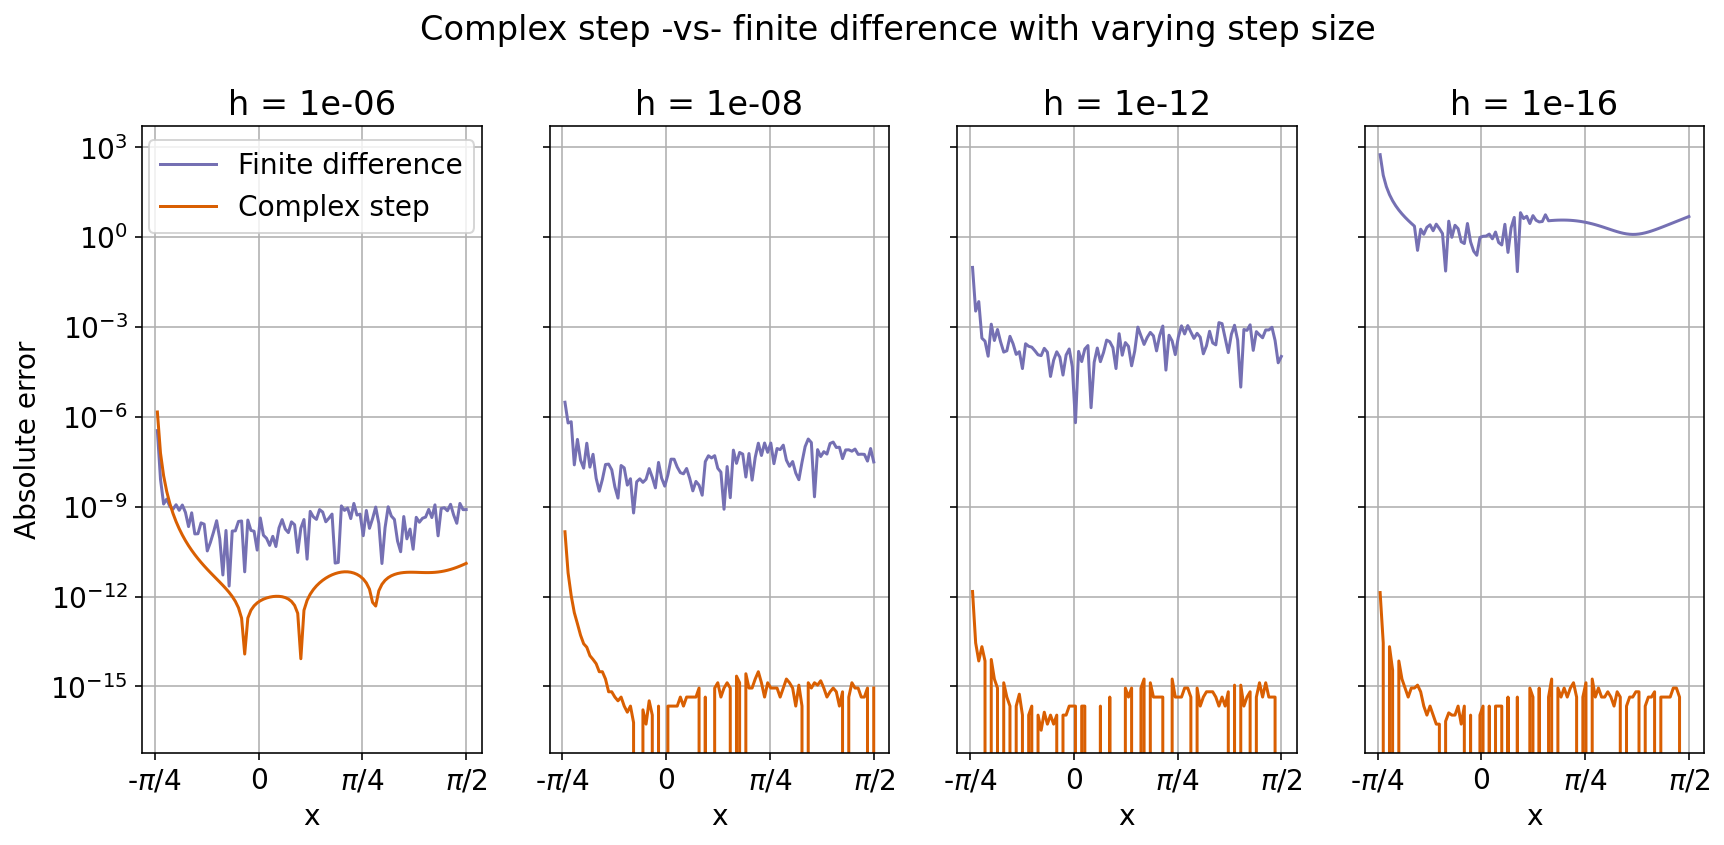

In [12]:
# Plot absolute errors for each step size
fig, splots = plt.subplots(figsize = (14, 6), 
                           ncols = 4, sharey = "row")

for jj, h in enumerate(steps):
    y1, y2 = csout[h], fdout[h]
    ax = splots[jj]
    ax.plot(x, abs(y2 - exact), "C2", lw = 1.5,
            label = "Finite difference")
    ax.plot(x, abs(y1 - exact), "C1", lw = 1.5,
            label = "Complex step")
    ax.set_yscale("log")
    ax.set_xticks([-np.pi/4, 0, np.pi/4, np.pi/2])
    ax.set_xticklabels(("-$\pi$/4", "0", "$\pi$/4", "$\pi$/2"))
    ax.set_xlabel("x")
    ax.set_title(f"h = {h:.0e}")
    ax.grid()
    if jj == 0:
        ax.set_ylabel("Absolute error")
        ax.legend(loc = "upper right", 
                  bbox_to_anchor = (1.02, 1))
plt.suptitle("Complex step -vs- finite difference with varying step size")
plt.subplots_adjust(top = 0.85)

In [13]:
# Uncomment to save plot
#outfile = Path("complex-step-v-finite-diff-2.png")
#fig.savefig(outfile, dpi = 150)

Another example from Squire and Trapp (1998)

In [14]:
g = lambda x: x**(9/2)
dgdx = csderiv(g)
# Exact derivative for comparison
# F'(1.5) = 18.60081273425975
gprime = lambda x: (9/2)*x**(7/2)
dgdx(1.5), gprime(1.5)

(18.60081273425976, 18.60081273425976)

In [15]:
print(dgdx(1.5) - gprime(1.5))

0.0
